In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sys
import os
import time


import mlflow
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb

In [ ]:
df1 = pd.read_excel("train1.xlsx")
df1

In [3]:
# dropping the customerid
df1.drop(['CustomerID'], axis=1, inplace=True)
df1.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RVOwner_50-100,RVOwner_100-200,RVOwner_200-300,RVOwner_300-400,RVOwner_400+,RVOwner_11-20,RVOwner_21-30,RVOwner_31-40,RVOwner_40+,RVOwner_Top 10
0,24.00,219,22,0.25,0,0.0,-157,-19.0,0.7,0.7,...,0,0,0,0,0,0,0,0,1,0
1,16.99,10,17,0.00,0,0.0,-4,0.0,0.3,0.0,...,0,0,0,0,0,0,0,0,1,0
2,38.00,8,38,0.00,0,0.0,-2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,82.28,1312,75,1.24,0,0.0,157,8.1,52.0,7.7,...,0,0,0,0,0,0,0,0,1,0
4,17.14,0,17,0.00,0,0.0,0,-0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# split the dataset into independent and dependent data
X = df1.drop('Churn', axis=1)
Y = df1['Churn']


# performing the split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.30,
                                                   random_state=1,
                                                   stratify = Y)

# Functions for Model Performance

In [5]:
# classification matrix, confusion matrix, model score
def model_performance(model_name,
                      x_train_data,
                      y_train_data, 
                      train_preds,
                      x_test_data,
                      y_test_data,
                      test_preds):
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data, test_preds)
    
    c = round(model_name.score(x_train_data, y_train_data),4)
    d = round(model_name.score(x_test_data, y_test_data),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data')
    print(b)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data is ',d)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)

    sns.heatmap(confusion_matrix(y_test_data, test_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data')
    plt.subplot(1,2,1)

    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    plt.subplot(1,2,2)
    
    
# model_performance(mod7,x_train, y_train, train_pred_mod7,x_test,y_test, test_pred_mod7)

In [6]:
# ROC AUC Plots
def roc_score_auc_curve(model_name,
                       x_train_data,
                       y_train_data, 
                       train_preds,
                       x_test_data,
                       y_test_data,
                       test_preds):
    a = round(roc_auc_score(y_train_data,model_name.predict_proba(x_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test,model_name.predict_proba(x_test_data)[:,1]),4)
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data is',b)
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(x_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data, model_name.predict_proba(x_test_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o') 
    
# roc_score_auc_curve(mod7, x_train, y_train, train_pred_mod7, x_test, y_test, test_pred_mod7)

In [7]:
# K-Fold Cross Validation Functions

def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    import pandas as pd
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='recall', verbose=0)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='accuracy', verbose=0)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='precision', verbose=0)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='f1', verbose=0)
    
    a = pd.DataFrame(model_kfold_recall)
    b = pd.DataFrame(model_kfold_accuracy)
    c = pd.DataFrame(model_kfold_precision)
    d = pd.DataFrame(model_kfold_f1)

    cross_val_data = pd.concat([a,b,c,d], ignore_index=True, axis=1)
    cross_val_data.rename(columns={0:"Recall", 1:"Accuracy", 2:"Precision",3:"F1 Score"},
                        inplace=True)
       
   
    print('\n')
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))
    print("\n")
    return cross_val_data

# k_fold_cross_valscore(mod7, x_train, y_train, folds=10)

# Model Building

### 1. LDA Model

In [8]:
# Creating instance of LDA Classifier
model_lda_b = LinearDiscriminantAnalysis()


# hyperparameter Param Grid
params = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [0.01, 0.001, 0.0001, 0.00001]
}

### 2. Logistic Regression

In [9]:
# creating instance of Logistic Regression Classifier
model_lr_base = LogisticRegression(max_iter = 10000, random_state=1)

# hyperparameter Param Grid
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol' : [0.01,0.001,0.0001],
    #'penalty': ['l1', 'l2'],
    'max_iter': [1000, 10000],
    'C' : np.logspace(-4,4,10,20),    
}

### 3. ADA Boost 

In [10]:
# Creating instance of ADA Boost
model_adb_base = AdaBoostClassifier(random_state=1)

# hyper parameter grid
params = {
        'n_estimators' : [500,600,700,800,900,1000,1100,1200,1300],
        'algorithm' : ['SAMME', 'SAMME.R'],
        'learning_rate' : [0.01,0.05,0.1,0.2,0.3,0.5]
}

### 4. SVM 

In [11]:
# creating instance of SVM
model_svm_base = svm.SVC(random_state=1, probability=True)

# hyperparameter grid
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
     'gamma' : [0.001, 0.01, 0.1, 1],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol' : [0.01,0.001,0.0001],
    }

### 5. Decision Trees

In [12]:
# creating an instance of Decicion Tree Classifier
model_dt_base = DecisionTreeClassifier(random_state=1, criterion='gini')

# hyper parameter grid
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [6,7,8,9,10,11,12,13,14],
    #'min_samples_leaf' : [15,20,25,30,35,40,45,50,55,60,65,70],
    #'min_samples_split' : [25,30,35,40,45,50,60,70,80,90,100],
    }

### 6. Random Forest 

In [13]:
# creating an instance of Random Forest Classifier
model_rf_base = RandomForestClassifier(random_state=1)

# hyper parameter grid
params = {
        'max_depth' : [7,8,9,10,11,12,13,14],
        'max_features': [15,16,17,18],
        #'min_samples_leaf': [15,20,25,30],
        #'min_samples_split': [60,65,70],
        'n_estimators' : [401,501,601,701,801],
}

### 7. KNN Classifier 

In [14]:
# creating an instance of KNN Classifier
model_knn_base = KNeighborsClassifier()

# hyperparameter grid
params = {
    'n_neighbors' : [2,3,5,7,],  #9,11
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [20,25,30,50, 100],
    'metric' :['minkowski','euclidean','manhattan','chebyshev']
    }

### 8. XGBoost Model

In [15]:
# creating an instance of XGBoost Classifier
model_xgb_base = xgb.XGBClassifier(random_state=1, use_label_encoder=False)

# hyper parameter grid
params = {
    'colsample_bytree': [0.5, 0.7], 
    'learning_rate': [0.1,0.5],      
    'max_depth': [7,8,9,10],         
    'n_estimators' : [800,900,1000,1100 ,1200],
    'subsample': [0.3,0.5, 0.7],
    
    }

### 9. ANN (sklearn) Model

In [16]:
# creating an instance of ANN model
model_ann_base = MLPClassifier(random_state=1, max_iter = 5000)

# hyper parameter grid
params = {
        'activation': ['logistic', 'relu', 'tanh', 'identity' ],
        'hidden_layer_sizes': [100, 200, 300, (100,100), (200,200), (300,300), (100, 100, 100)],
        'max_iter' : [10000],
        'solver': ['sgd', 'adam', 'lbfgs'],
        #'tol': [0.1,0.5,0.01],
}

### 10. Quadratic Disriminant Analysis

In [17]:
# creating an instance of QDA model
model_qda_base = QuadraticDiscriminantAnalysis()

# hyper parameter grid
params = {
    'reg_param': [0.0, 0.5, 1.0],
    'tol': [0.01, 0.001, 0.0001]
}

# Fitting the Base Models 

In [24]:
# Setting up a dictionary
base_models = {
    'base LDA Model' : LinearDiscriminantAnalysis(),
    'base Logistic Regression Model' : LogisticRegression(random_state=1, max_iter=100000),
    'base ADA Boost Model' : AdaBoostClassifier(random_state=1),
    # 'base Support Vector Model' : svm.SVC(random_state=1, probability=True),
    'base Decision Tree Model' : DecisionTreeClassifier(random_state=1, criterion='gini'),
    'base Random Forest Model' : RandomForestClassifier(random_state=1),
    'base KNN Model' : KNeighborsClassifier(),
    'base XGB Classifier' : xgb.XGBClassifier(random_state=1, use_label_encoder=False),
    'base MLP Classifier' : MLPClassifier(random_state=1, max_iter = 5000),
    'base QDA Model' : QuadraticDiscriminantAnalysis()
}

BASE LDA MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     24855
           1       0.49      0.03      0.06      9971

    accuracy                           0.71     34826
   macro avg       0.61      0.51      0.45     34826
weighted avg       0.65      0.71      0.61     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10652
           1       0.48      0.03      0.06      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.44     14926
weighted avg       0.65      0.71      0.61     14926



the model score for training data is  0.7134
the model score for testing data is  0.7128


AUC Score for Model on Training Data is 0.623
AUC Score for Model on Testing Data is 0.6171


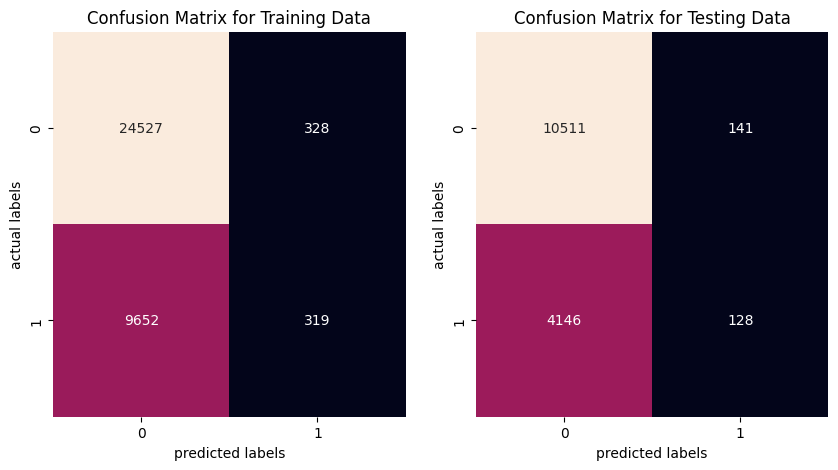

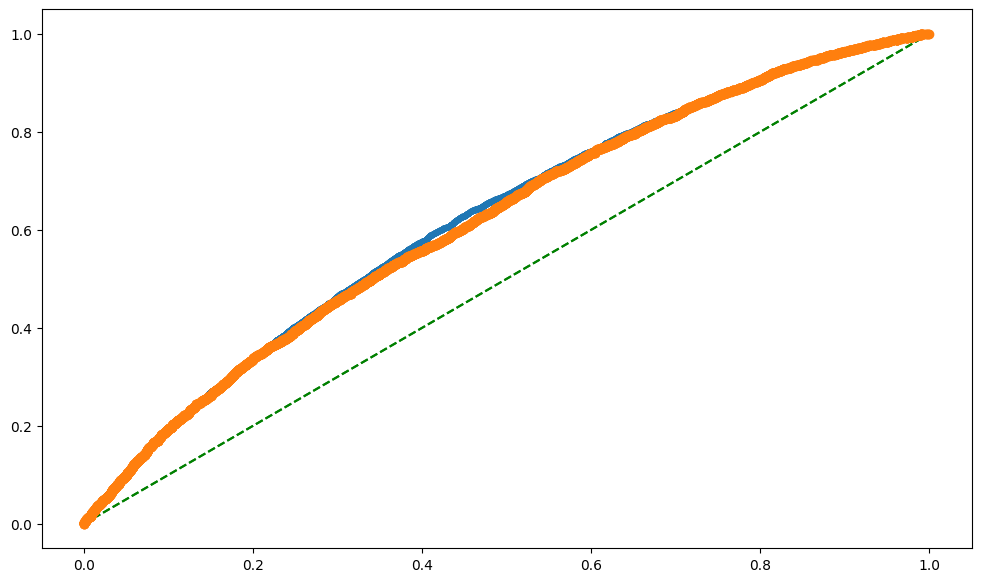



######################################################################################################################################################################################################


BASE LOGISTIC REGRESSION MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     24855
           1       0.50      0.03      0.06      9971

    accuracy                           0.71     34826
   macro avg       0.61      0.51      0.45     34826
weighted avg       0.66      0.71      0.61     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10652
           1       0.49      0.03      0.06      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.45     14926
weighted avg       0.65      0.71      0.61     14926



the model score for training 

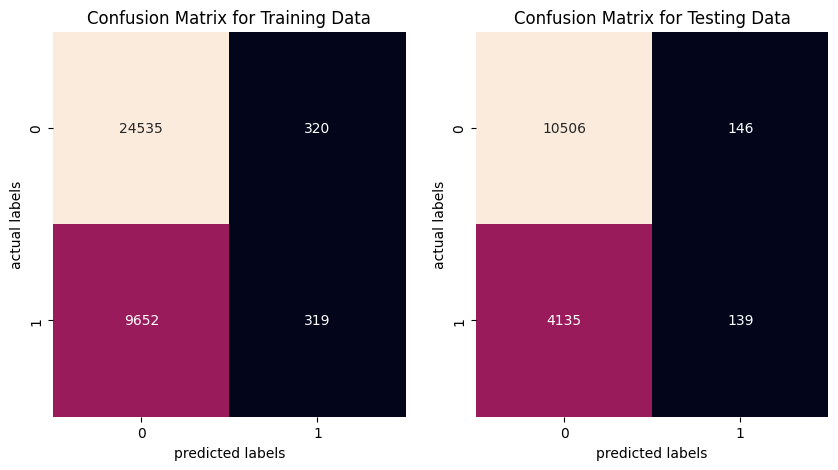

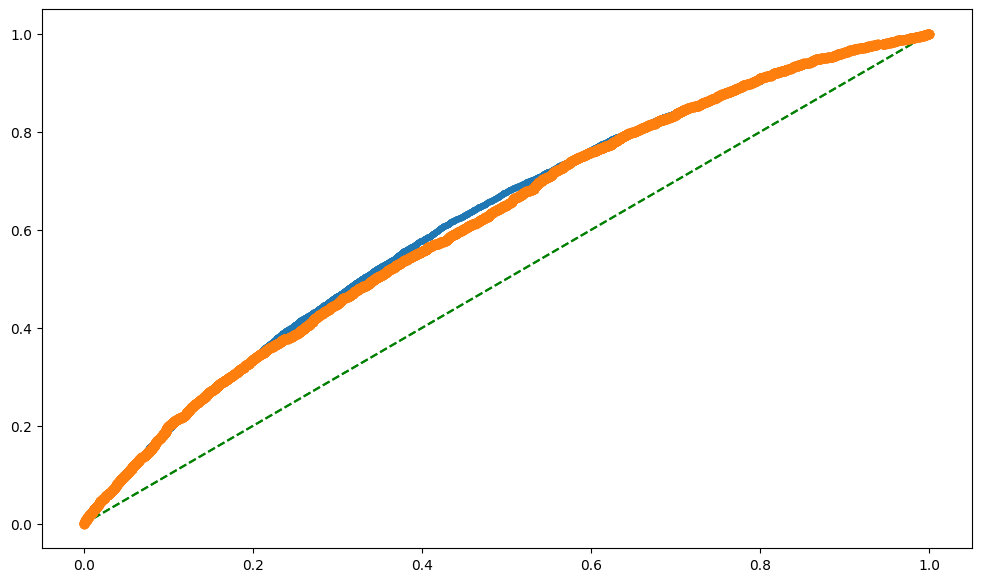



######################################################################################################################################################################################################


BASE ADA BOOST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     24855
           1       0.55      0.10      0.17      9971

    accuracy                           0.72     34826
   macro avg       0.64      0.53      0.50     34826
weighted avg       0.68      0.72      0.64     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     10652
           1       0.55      0.10      0.17      4274

    accuracy                           0.72     14926
   macro avg       0.64      0.53      0.50     14926
weighted avg       0.68      0.72      0.64     14926



the model score for training data is  0

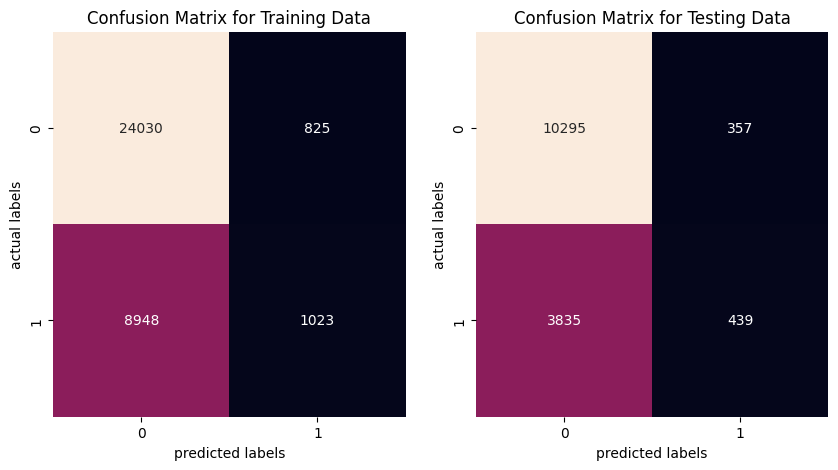

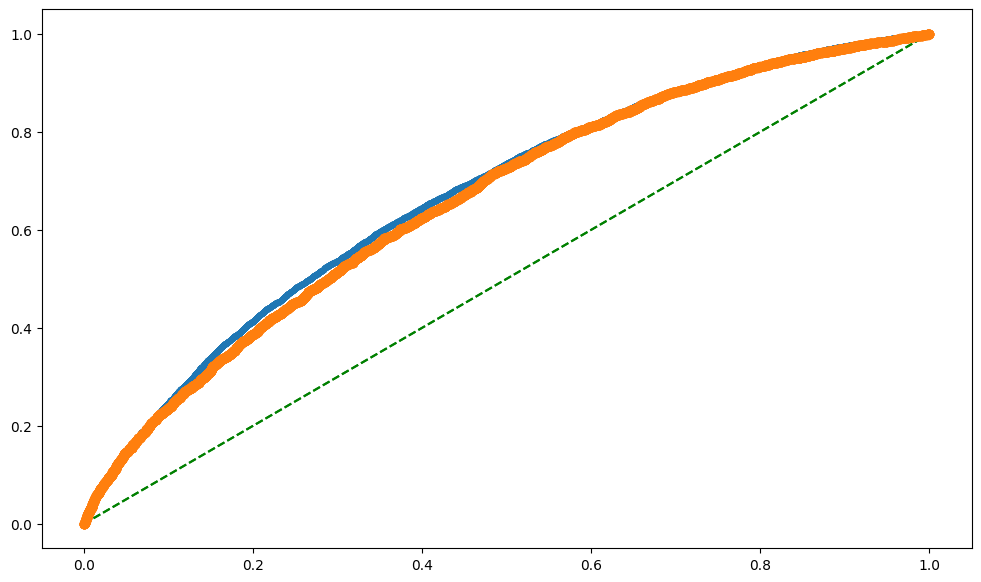



######################################################################################################################################################################################################


BASE DECISION TREE MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10652
           1       0.35      0.37      0.36      4274

    accuracy                           0.62     14926
   macro avg       0.54      0.55      0.55     14926
weighted avg       0.63      0.62      0.63     14926



the model score for training data i

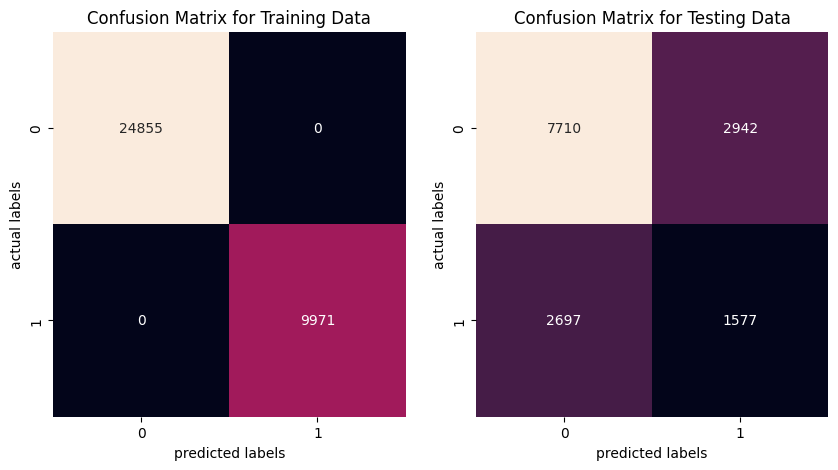

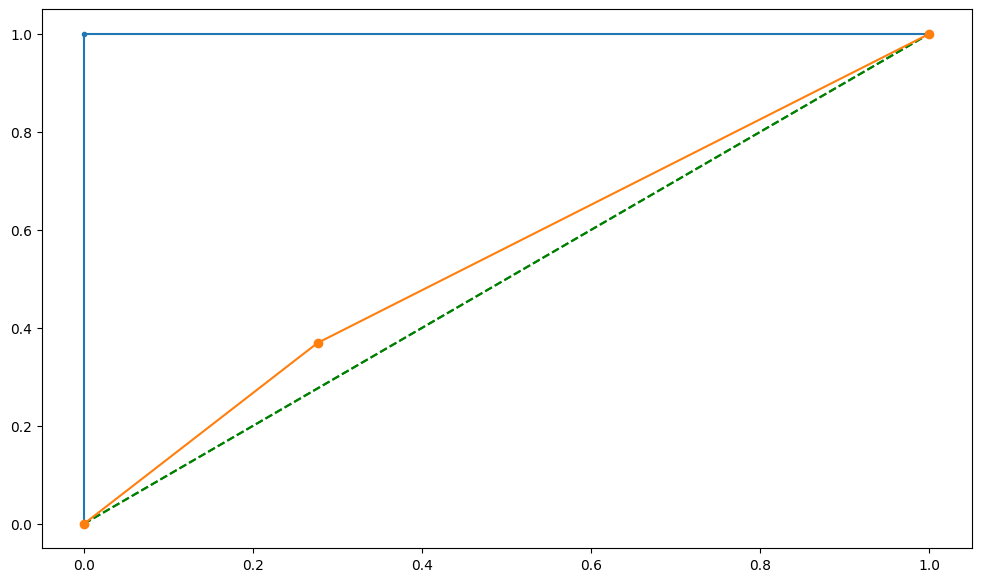



######################################################################################################################################################################################################


BASE RANDOM FOREST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10652
           1       0.57      0.07      0.12      4274

    accuracy                           0.72     14926
   macro avg       0.65      0.52      0.48     14926
weighted avg       0.68      0.72      0.63     14926



the model score for training data i

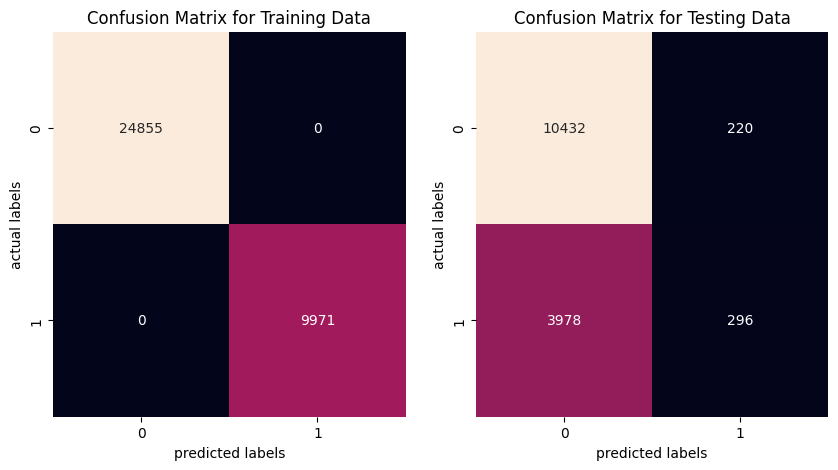

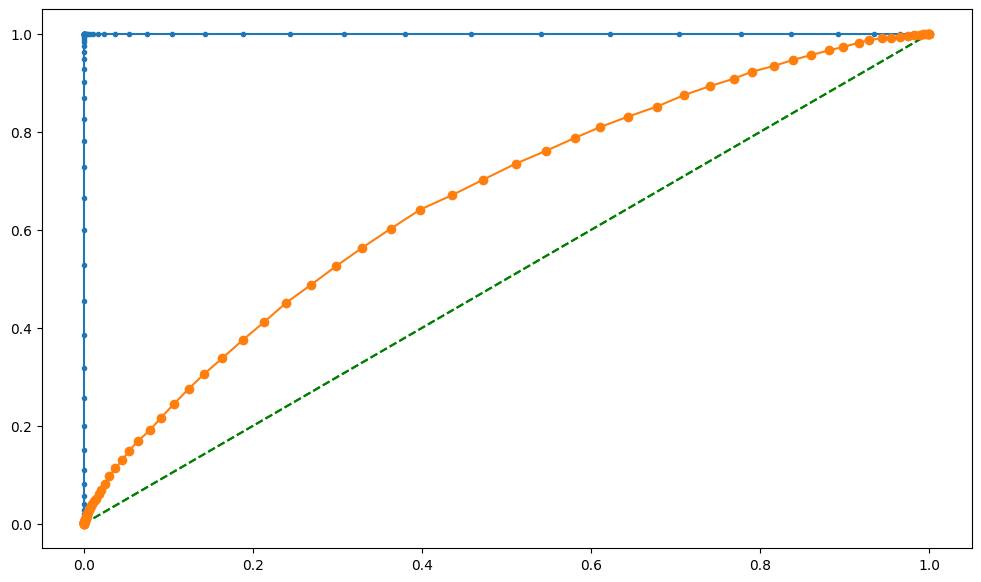



######################################################################################################################################################################################################


BASE KNN MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     24855
           1       0.67      0.37      0.48      9971

    accuracy                           0.77     34826
   macro avg       0.73      0.65      0.66     34826
weighted avg       0.75      0.77      0.74     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     10652
           1       0.37      0.19      0.26      4274

    accuracy                           0.67     14926
   macro avg       0.55      0.53      0.52     14926
weighted avg       0.63      0.67      0.64     14926



the model score for training data is  0.7662


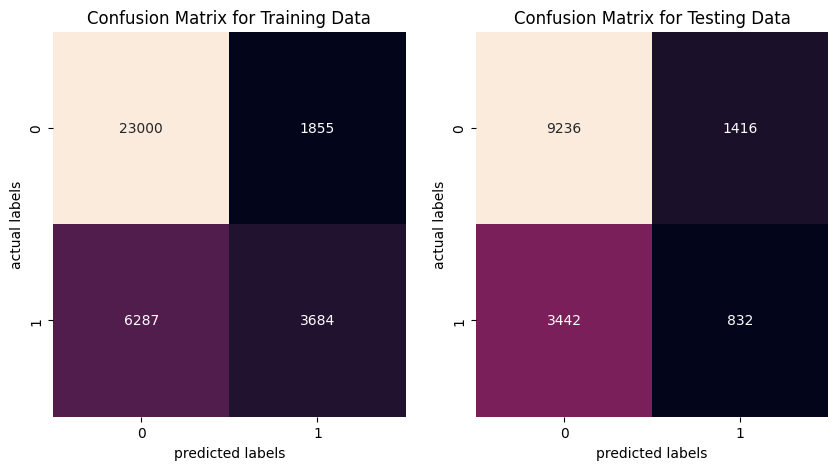

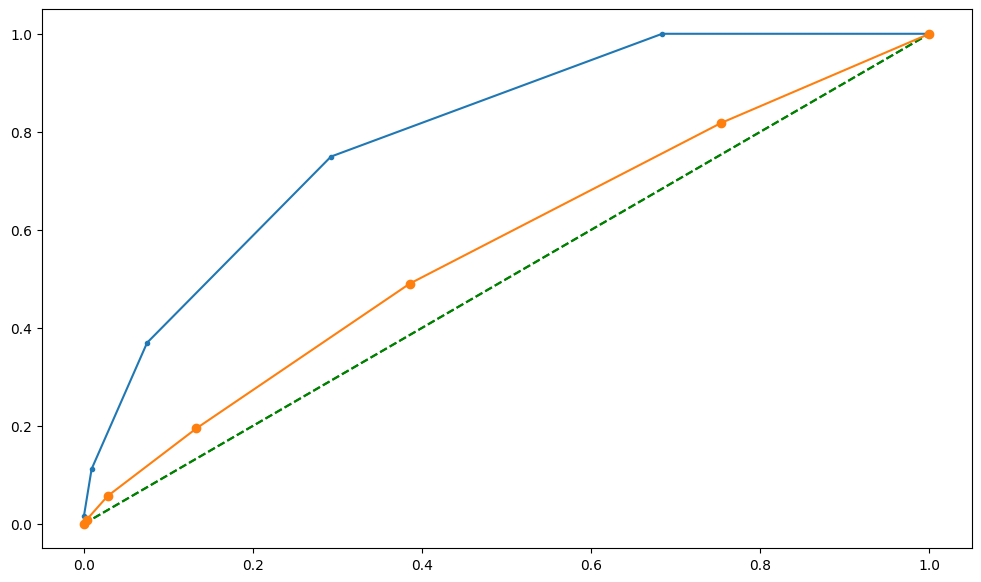



######################################################################################################################################################################################################


BASE XGB CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     24855
           1       0.92      0.50      0.65      9971

    accuracy                           0.84     34826
   macro avg       0.87      0.74      0.77     34826
weighted avg       0.86      0.84      0.83     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     10652
           1       0.50      0.20      0.28      4274

    accuracy                           0.71     14926
   macro avg       0.62      0.56      0.55     14926
weighted avg       0.67      0.71      0.67     14926



the model score for training data is  0.

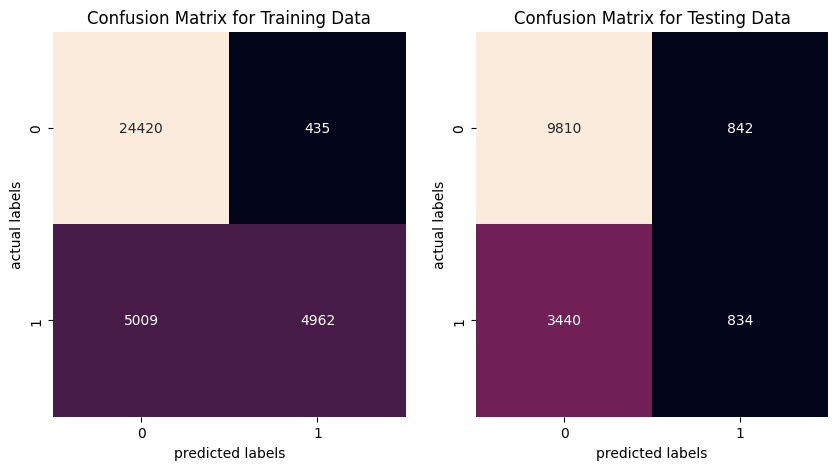

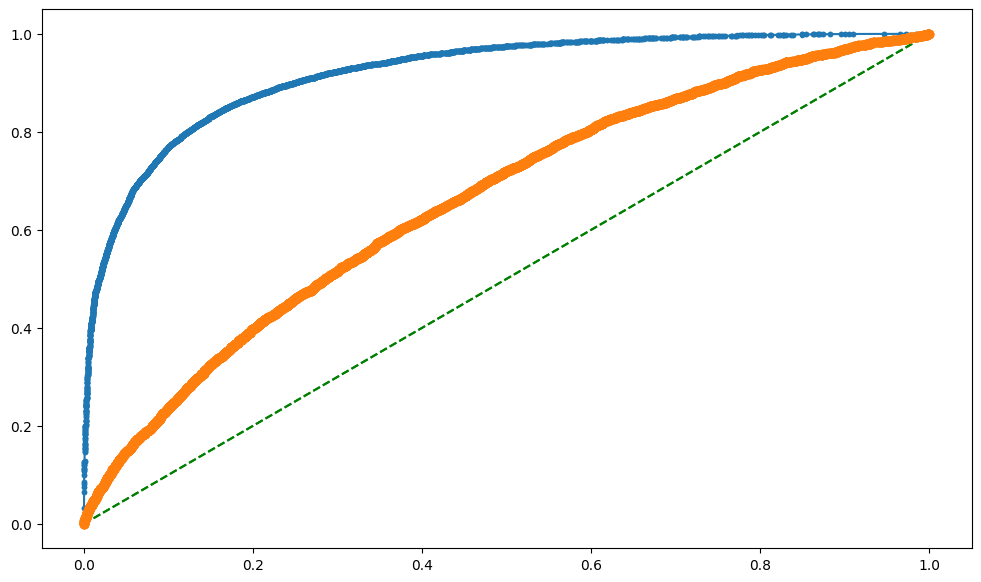



######################################################################################################################################################################################################


BASE MLP CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     24855
           1       0.39      0.53      0.45      9971

    accuracy                           0.63     34826
   macro avg       0.58      0.60      0.58     34826
weighted avg       0.67      0.63      0.64     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.76      0.65      0.70     10652
           1       0.36      0.49      0.42      4274

    accuracy                           0.61     14926
   macro avg       0.56      0.57      0.56     14926
weighted avg       0.65      0.61      0.62     14926



the model score for training data is  0.

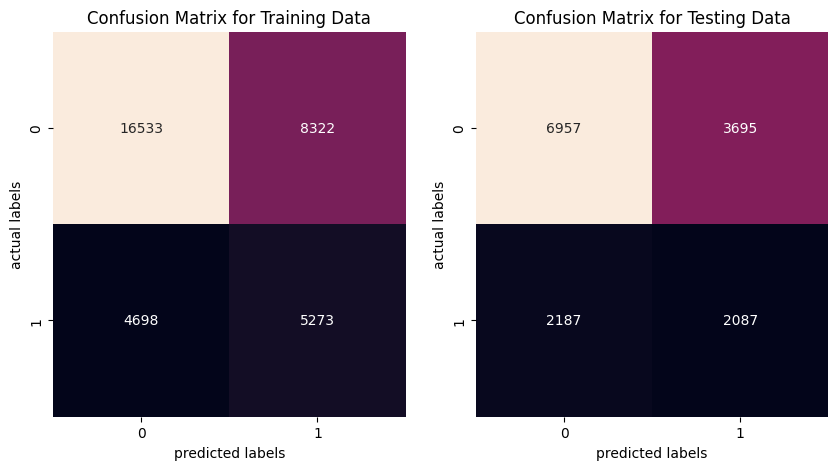

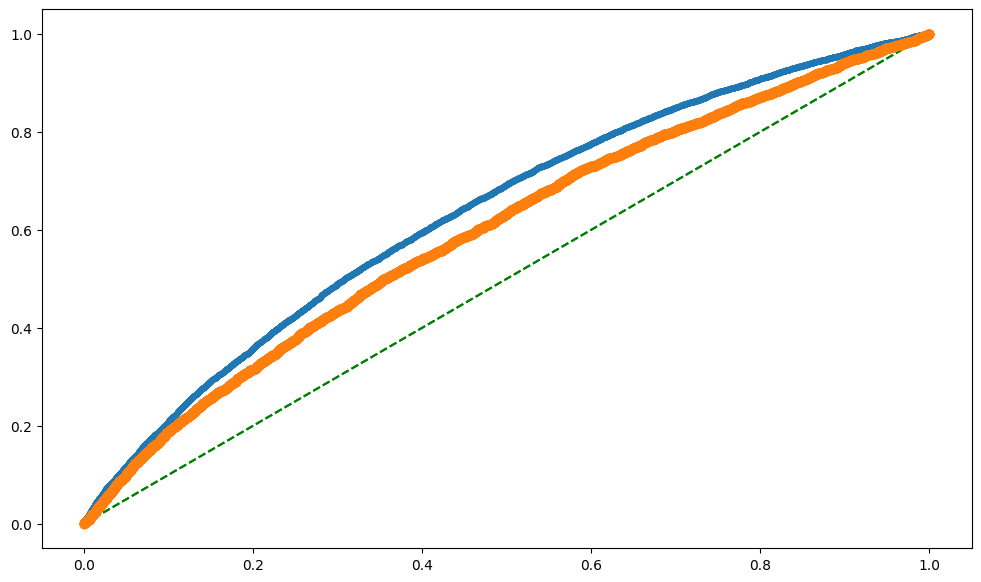



######################################################################################################################################################################################################


BASE QDA MODEL


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


classification report for training data
              precision    recall  f1-score   support

           0       0.87      0.03      0.05     24855
           1       0.29      0.99      0.45      9971

    accuracy                           0.30     34826
   macro avg       0.58      0.51      0.25     34826
weighted avg       0.70      0.30      0.17     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.79      0.02      0.05     10652
           1       0.29      0.98      0.45      4274

    accuracy                           0.30     14926
   macro avg       0.54      0.50      0.25     14926
weighted avg       0.64      0.30      0.16     14926



the model score for training data is  0.303
the model score for testing data is  0.2993


AUC Score for Model on Training Data is 0.6058
AUC Score for Model on Testing Data is 0.576


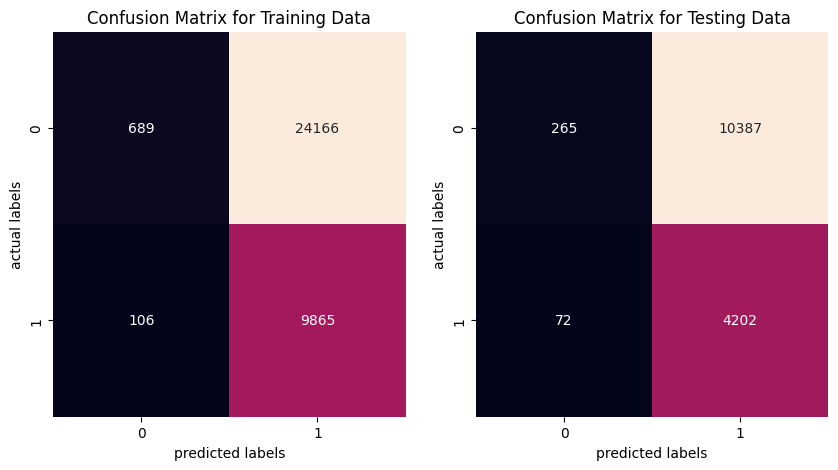

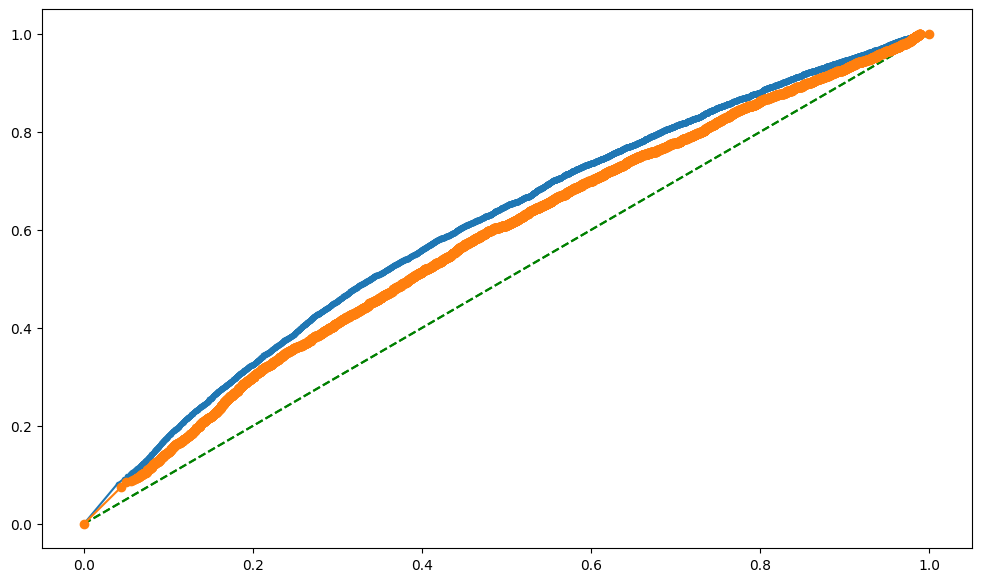



######################################################################################################################################################################################################




In [33]:
# function for training a model
def model_training(model, x_train, y_train):
    # Train the Model on training data
    trained_model = model.fit(x_train, y_train)
    return trained_model



for model_name,model in base_models.items():
    print(model_name.upper())
    
    # Model Training
    trained_model = model_training(model, x_train, y_train)
    
    # # train and test preds
    train_pred_mod = trained_model.predict(x_train)
    test_pred_mod = trained_model.predict(x_test)

    
    # # look at the model performance metrics
    model_performance(trained_model , x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)


    # # ROC-AUC 
    roc_score_auc_curve(trained_model, x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)

    # Display the plots
    plt.show()

    
    print('\n')
    print('######################################################################################################################################################################################################')
    print('\n')

# Model Tuning

In [ ]:
# Setting up a dictionary
base_models = {
    'base LDA Model' : LinearDiscriminantAnalysis(),
    'base Logistic Regression Model' : LogisticRegression(random_state=1, max_iter=100000),
    'base ADA Boost Model' : AdaBoostClassifier(random_state=1),
    # 'base Support Vector Model' : svm.SVC(random_state=1, probability=True),
    'base Decision Tree Model' : DecisionTreeClassifier(random_state=1, criterion='gini'),
    'base Random Forest Model' : RandomForestClassifier(random_state=1),
    'base KNN Model' : KNeighborsClassifier(),
    'base XGB Classifier' : xgb.XGBClassifier(random_state=1, use_label_encoder=False),
    'base MLP Classifier' : MLPClassifier(random_state=1, max_iter = 5000),
    'base QDA Model' : QuadraticDiscriminantAnalysis()
}

In [34]:
# creating an instance of Decicion Tree Classifier
model_dt_base = DecisionTreeClassifier(random_state=1, criterion='gini')

# hyper parameter grid
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [6,7,8,9,10,11,12,13,14],
    #'min_samples_leaf' : [15,20,25,30,35,40,45,50,55,60,65,70],
    #'min_samples_split' : [25,30,35,40,45,50,60,70,80,90,100],
    }

In [35]:
models = {
    'base Decision Tree Model' : DecisionTreeClassifier(random_state=1, criterion='gini')
}

Fitting DT...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.112 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=6;, score=0.072 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=6;, score=0.062 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=6;, score=0.058 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=6;, score=0.077 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=7;, score=0.131 total time=   0.3s
[CV 2/5] END .......criterion=gini, max_depth=7;, score=0.057 total time=   0.3s
[CV 3/5] END .......criterion=gini, max_depth=7;, score=0.064 total time=   0.3s
[CV 4/5] END .......criterion=gini, max_depth=7;, score=0.066 total time=   0.3s
[CV 5/5] END .......criterion=gini, max_depth=7;, score=0.097 total time=   0.3s
[CV 1/5] END .......criterion=gini, max_depth=8;, score=0.133 total time=   0.3s
[CV 2/5] END .......criterion=gini

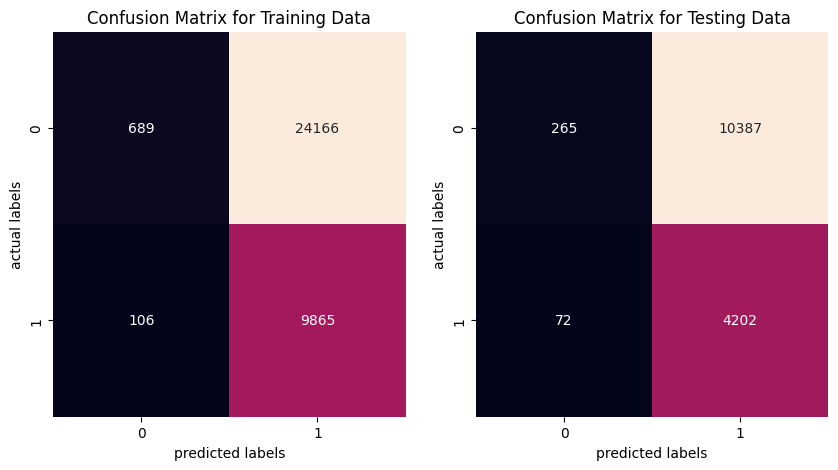

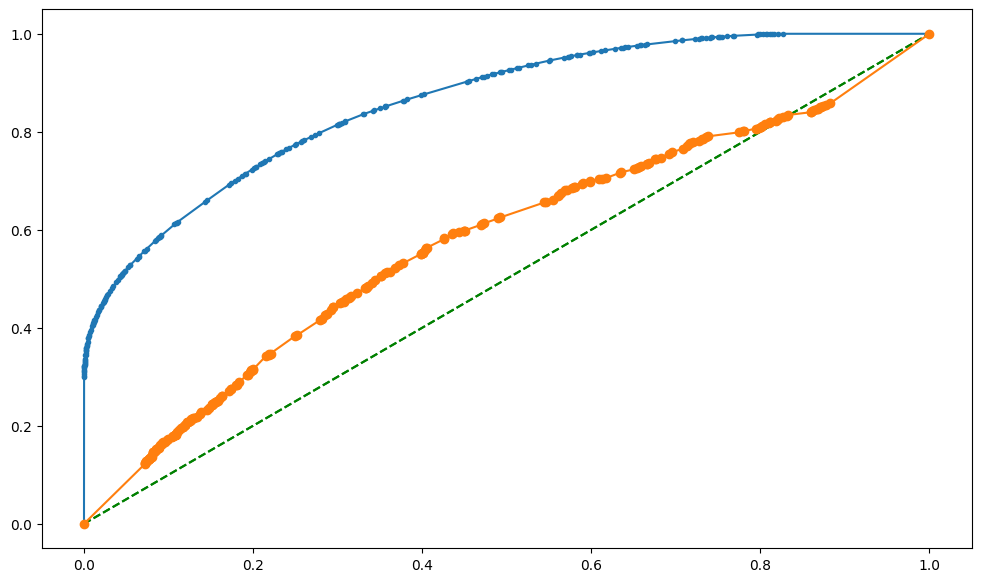



######################################################################################################################################################################################################




In [40]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary of models and their respective parameter grids
models = {'DT': (DecisionTreeClassifier(random_state=1, criterion='gini'), 
                 {'criterion' : ['gini', 'entropy'],
                  'max_depth' : [6,7,8,9,10,11,12,13,14]
                 },
            
            )
    
    # Add other models and their parameter grids
}

# Iterate over the models
for model_name, (model, param_grid) in models.items():
    print(f"Fitting {model_name}...")
    
    # Set up the GridSearchCV for the current model
    grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=5, verbose=3)
    
    # Fit the GridSearchCV to the training data
    best_model = grid_search.fit(x_train, y_train)
    
    # Access the best model from the GridSearchCV results
    best_model = best_model.best_estimator_
    

    # # look at the model performance metrics
    model_performance(best_model , x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)


    # # ROC-AUC 
    roc_score_auc_curve(best_model, x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)

    # Display the plots
    plt.show()

    
    print('\n')
    print('######################################################################################################################################################################################################')
    print('\n')